In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
df = pd.read_csv('data.csv')
#df = pd.read_csv('/content/gdrive/MyDrive/M156 Final Project/data.csv')

In [15]:
df

,GAME_DATE_EST,GAME_ID,SELF_NICKNAME,SELF_ABBREV,OPP_NICKNAME,OPP_ABBREV,PTS_self,PTS_opp,FG_PCT_self,FT_PCT_self,FG3_PCT_self,AST_self,REB_self,FG_PCT_opp,FT_PCT_opp,FG3_PCT_opp,AST_opp,REB_opp,HOME?,WIN?
0,2022-04-10,22101216,Nets,BKN,Pacers,IND,134,126,0.642,0.880,0.364,30,50,0.452,0.684,0.413,32,30,1,1
1,2022-04-10,22101217,Hornets,CHA,Wizards,WAS,124,108,0.539,0.714,0.545,34,48,0.447,0.615,0.348,25,43,1,1
2,2022-04-10,22101218,Cavaliers,CLE,Bucks,MIL,133,115,0.543,0.706,0.500,39,48,0.443,0.781,0.400,27,41,1,1
3,2022-04-10,22101221,Rockets,HOU,Hawks,ATL,114,130,0.461,0.750,0.370,24,34,0.517,0.792,0.553,29,50,1,0
4,2022-04-10,22101223,Grizzlies,MEM,Celtics,BOS,110,139,0.382,0.630,0.319,27,45,0.545,1.000,0.375,34,56,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,2021-10-04,12100007,Jazz,UTA,Spurs,SAS,85,111,0.317,0.600,0.233,14,47,0.465,0.760,0.353,22,60,0,0
2588,2021-10-04,12100008,Warriors,GSW,Trail Blazers,POR,121,107,0.420,0.765,0.348,32,47,0.446,0.773,0.421,21,53,0,1
2589,2021-10-04,12100009,Suns,PHX,Kings,SAC,106,117,0.467,0.846,0.314,24,38,0.473,0.684,0.340,22,51,0,0
2590,2021-10-04,12100010,Nuggets,DEN,Clippers,LAC,102,103,0.430,0.621,0.270,20,45,0.432,0.760,0.333,26,52,0,0


In [16]:
y_df = df.pop('PTS')
df.pop('Nickname')
df.pop('Abbreviation')
df.pop('GAME_DATE_EST')
df.pop('GAME_ID')
     
y = y_df.to_numpy()
X = df.to_numpy()

KeyError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4).fit(X_train, y_train)

print('Linear Regresssion:\n')
print('coefficients: ' + str(reg.coef_))
print('intercept: ' + str(reg.intercept_))
print('score: ' + str(reg.score(X_test, y_test)))
print('\n')

print('Bayesian Ridge Regresssion:\n')
print('coefficients: ' + str(bayes.coef_))
print('intercept: ' + str(bayes.intercept_))
print('score: ' + str(bayes.score(X_test, y_test)))
print('\n')

print('Random Forest Regresssion:\n')
print('score: ' + str(rfr.score(X_test, y_test)))
print('\n')

prediction_reg = []
actual_reg = []

prediction_bayes = []
actual_bayes = []

prediction_rfr = []
actual_rfr = []

for i in range(len(y_test)):
  prediction_reg.append(reg.predict([X_test[i]])[0])
  actual_reg.append(y_test[i])

  prediction_bayes.append(bayes.predict([X_test[i]])[0])
  actual_bayes.append(y_test[i])

  prediction_rfr.append(rfr.predict([X_test[i]])[0])
  actual_rfr.append(y_test[i])

Linear Regresssion:

coefficients: [ 1.24044242e+02  1.61594371e+01  3.03419142e+01  5.31977062e-01
  3.98008636e-01 -7.99124483e-02]
intercept: -0.6505360977428154
score: 0.7039969556207331


Bayesian Ridge Regresssion:

coefficients: [ 1.23433632e+02  1.61502724e+01  3.04440639e+01  5.35208559e-01
  3.97192689e-01 -7.76793782e-02]
intercept: -0.44205958032439696
score: 0.7039946592289619


Random Forest Regresssion:

score: 0.6446943662090976




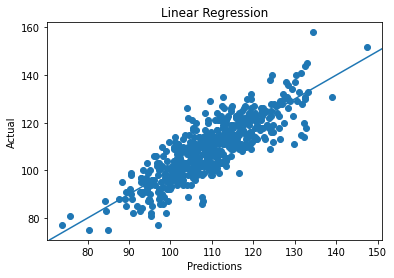

MSE: 46.86074535459473
Mean Absolute Error: 5.377125337610828




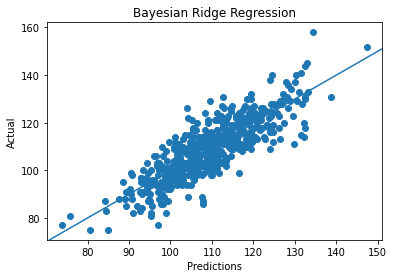

MSE: 46.861108900281394
Mean Absolute Error: 5.378578580910337




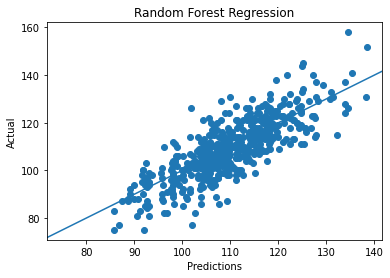

MSE: 56.24903913756699
Mean Absolute Error: 5.891728846651424


In [ ]:
plt.scatter(prediction_reg, actual_reg)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_reg, prediction_reg)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_reg, prediction_reg)))
print("\n")

plt.scatter(prediction_bayes, actual_bayes)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Bayesian Ridge Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_bayes, prediction_bayes)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_bayes, prediction_bayes)))
print("\n")

plt.scatter(prediction_rfr, actual_rfr)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Random Forest Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_rfr, prediction_rfr)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_rfr, prediction_rfr)))

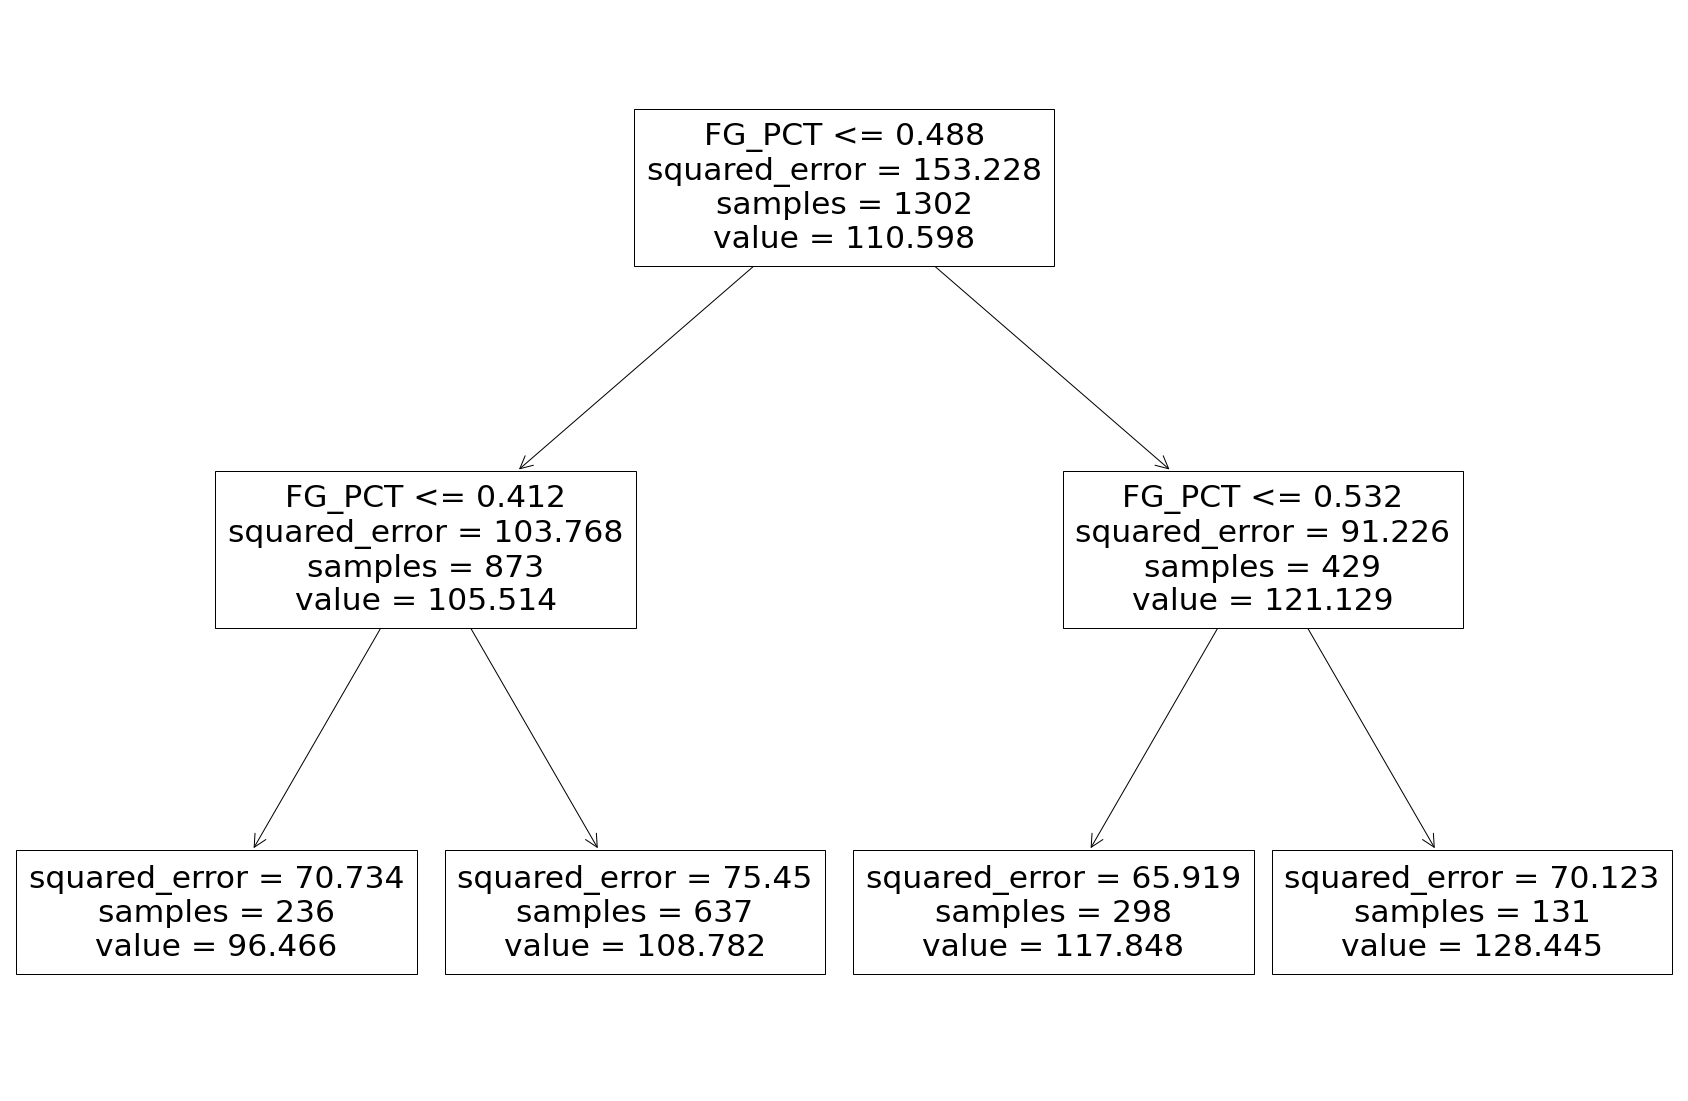

In [ ]:
from sklearn import tree

rfr = RandomForestRegressor(n_estimators = 20, max_depth = 2).fit(X_train, y_train)

fig = plt.figure(figsize=(30, 20))
tree.plot_tree(rfr.estimators_[0], feature_names=['FG_PCT',	'FT_PCT',	'FG3_PCT',	'AST',	'REB', ])
plt.show()

In [6]:
full_df = pd.read_csv('data.csv')

# predict points based off of that game's data
def predict(date, home_team, away_team):
  home = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['Nickname'] == home_team].iloc[0]
  away = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['Nickname'] == away_team].iloc[0]

  home_stats = [home['FG_PCT'], home['FT_PCT'], home['FG3_PCT'], home['AST'], home['REB'], 1]
  away_stats = [away['FG_PCT'], away['FT_PCT'], away['FG3_PCT'], away['AST'], away['REB'], 0]

  print('Linear Regression:\n')
  print('Predict ' + str(home_team) + ' scored ' +  str(round(reg.predict([home_stats])[0])))
  print('Predict ' + str(away_team) + ' scored ' +  str(round(reg.predict([away_stats])[0])))
  print('\n')

  print('Bayesian Regression:\n')
  print('Predict ' + str(home_team) + ' scored ' +  str(round(bayes.predict([home_stats])[0])))
  print('Predict ' + str(away_team) + ' scored ' +  str(round(bayes.predict([away_stats])[0])))
  print('\n')

  print('Random Forest Regression:\n')
  print('Predict ' + str(home_team) + ' scored ' +  str(round(rfr.predict([home_stats])[0])))
  print('Predict ' + str(away_team) + ' scored ' +  str(round(rfr.predict([away_stats])[0])))
  print('\n')

  print('Actual points scored for ' + str(home_team) + ': ' + str(home['PTS']))
  print('Actual points scored for ' + str(away_team) + ': ' + str(away['PTS']))

predict('2022-04-10', 'Nets', 'Pacers')
predict('2022-04-09', 'Spurs', 'Warriors')

FileNotFoundError: ignored

In [ ]:
# Team nickname mapped to the correspond team's averages for the 2021-2022 NBA Season
# Compiled here: https://colab.research.google.com/drive/1UtIspHP5SgaUDWZAng38vAg4lIJJoyM7#scrollTo=sYFhaEMqEBdq
team_to_avgs = {'Timberwolves': [0.457, 0.778, 0.358, 44.2, 25.7], 'Grizzlies': [0.461, 0.7340000000000001, 0.353, 49.2, 26.0], 'Bucks': [0.46799999999999997, 0.7759999999999999, 0.366, 46.7, 23.9], 'Hornets': [0.46799999999999997, 0.74, 0.365, 44.6, 28.1], 'Suns': [0.485, 0.797, 0.364, 45.3, 27.4], 'Hawks': [0.47, 0.812, 0.374, 44.0, 24.6], 'Jazz': [0.47100000000000003, 0.767, 0.36, 46.3, 22.4], 'Spurs': [0.467, 0.754, 0.35200000000000004, 45.3, 27.9], 'Nets': [0.475, 0.805, 0.361, 44.4, 25.3], 'Nuggets': [0.483, 0.795, 0.353, 44.1, 27.8], 'Lakers': [0.469, 0.732, 0.34700000000000003, 44.0, 24.0], 'Celtics': [0.466, 0.816, 0.35600000000000004, 46.1, 24.8], 'Bulls': [0.48, 0.813, 0.369, 42.3, 23.9], 'Pacers': [0.46299999999999997, 0.768, 0.344, 43.9, 25.4], 'Warriors': [0.469, 0.769, 0.364, 45.5, 27.1], 'Kings': [0.46, 0.768, 0.344, 42.9, 23.7], 'Heat': [0.467, 0.8079999999999999, 0.379, 43.7, 25.5], '76ers': [0.466, 0.821, 0.364, 42.3, 23.7], 'Rockets': [0.456, 0.713, 0.349, 42.0, 23.6], 'Raptors': [0.445, 0.759, 0.349, 45.3, 22.1], 'Pelicans': [0.457, 0.789, 0.332, 45.2, 25.0], 'Wizards': [0.47200000000000003, 0.7829999999999999, 0.342, 43.1, 25.0], 'Clippers': [0.45799999999999996, 0.7929999999999999, 0.374, 44.0, 24.0], 'Mavericks': [0.461, 0.7709999999999999, 0.35, 43.0, 23.4], 'Cavaliers': [0.469, 0.76, 0.355, 44.2, 25.2], 'Knicks': [0.43700000000000006, 0.7440000000000001, 0.35700000000000004, 46.1, 21.9], 'Trail Blazers': [0.442, 0.76, 0.34600000000000003, 42.9, 22.9], 'Pistons': [0.431, 0.782, 0.326, 43.0, 23.5], 'Magic': [0.434, 0.787, 0.331, 44.3, 23.7], 'Thunder': [0.43, 0.7559999999999999, 0.32299999999999995, 45.6, 22.2]}

In [ ]:
# predict points based off of team average data for the 2021-2022 NBA Season
def predict(date, home_team, away_team, verbose):
  home = df.loc[df['GAME_DATE_EST'] == date].loc[df['Nickname'] == home_team].iloc[0]
  away = df.loc[df['GAME_DATE_EST'] == date].loc[df['Nickname'] == away_team].iloc[0]

  home_stats = team_to_avgs[home_team][:]
  away_stats = team_to_avgs[away_team][:]

  home_stats.append(1)
  away_stats.append(0)

  if verbose:
    print('Linear Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(reg.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(reg.predict([away_stats])[0])))
    print('\n')

    print('Bayesian Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(bayes.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(bayes.predict([away_stats])[0])))
    print('\n')

    print('Random Forest Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(rfr.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(rfr.predict([away_stats])[0])))
    print('\n')

    print('Actual points scored for ' + str(home_team) + ': ' + str(home['PTS']))
    print('Actual points scored for ' + str(away_team) + ': ' + str(away['PTS']))

  home_team_won = home['PTS'] > away['PTS']
  home_team_predicted_to_win = reg.predict([home_stats])[0] > reg.predict([away_stats])[0]
  accurate_win_prediction = (home_team_predicted_to_win == True and home_team_won == True) \
                        or (home_team_predicted_to_win == False and home_team_won == False)
  return accurate_win_prediction

predict('2022-04-10', 'Nets', 'Pacers', True)

Linear Regression:

Predict Nets to score 116
Predict Pacers to score 113


Bayesian Regression:

Predict Nets to score 116
Predict Pacers to score 113


Random Forest Regression:

Predict Nets to score 115
Predict Pacers to score 109


Actual points scored for Nets: 134
Actual points scored for Pacers: 126


True

In [ ]:
correct = 0
for i in range(int(len(full_df)/2)):
  if predict(full_df.iloc[i]['GAME_DATE_EST'], full_df.iloc[i]['Nickname'], full_df.iloc[i+int(len(full_df)/2)]['Nickname'], False):
    correct += 1

print(correct / int(len(full_df)/2))

0.6118827160493827
